## 20 协同过滤：推荐朋友喜欢的商品
### 20.1 理解协同过滤
根据**数据源不同**的推荐引擎分类，根据不同的数据源发现数据相关性的方法可以分为以下几种：
- 1. 根据系统用户的基本信息发现用户的相关程度，这种被称为**基于人口统计学的推荐**（Demographic-based Recommendation）
- 2. 根据推荐物品或内容的元数据，发现物品或者内容的相关性，这种被称为**基于内容的推荐**（Content-based Recommendation）
- 3. 根据用户对物品或者信息的偏好，发现物品或者内容本身的相关性，或者是发现用户的相关性，这种被称为**基于协同过滤的推荐**（Collaborative Filtering-based Recommendation）。

基于内容推荐的算法完全是依赖于历史购买记录。 基于协同过滤的推荐算法恰恰跟这个相反，是根据类似用户的行为来推荐的。

计算用户相似度，要考虑到一个问题，即每个人的标准是不一样的，所以需要把每个人的标准(scale)也考虑进来。如将分数减去平均值。

利用用户之间的相似度来预测评分


### 20.2 隐变量模型与矩阵分解算法

**矩阵分解**是在推荐系统中经常使用的一种算法。

对于一个推荐系统，其用户数据可以整理成一个user-item矩阵。矩阵中每一行代表一个用户，而每一列则代表一个物品。若用户对物品有过评分，则矩阵中处在用户对应的行与物品对应的列交叉的位置表示用户对物品的评分值。这个user-item矩阵被称为评分矩阵。因为物品数量比较多，用户不会对很多物品进行评价，所以这个矩阵是一个**稀疏矩阵**。对于稀疏矩阵进行分解是一个较为有效的方法。

矩阵分解的输入是标注好的矩阵，也就是某一个人对某一个商品的评价，可以理解为`m*n`的矩阵。这里的m为用户总数，n为商品总数。我们需要把这个矩阵分解为两个矩阵，分别代表的是每一个**用户**和每一个**商品**的向量，也可以理解成为**embedding**，类似于词向量。在文本领域我们通常会使用词向量技术，也就是把一个单词表示成向量的形式。类似的，我们也可以把用户或者商品表示成向量。不管这个向量表示的是单词、用户还是商品，都是类似的。

所以，矩阵分解技术可以理解为从历史交易数据中学出用户和商品的向量。具体向量的维度是人为指定的，这种也叫作超参数。

> $M:m*n$  
> $M=U*V;U:m*k;V:k*n$  | 其中，k是超参数
> U中每行可以看做用户的k维特征向量。实际上，这个可解释性较差，我们可以把它理解成**词向量**。
> V中每列可以看做商品的k维特征向量。用向量来表示商品。
> 目标函数的构造：每个用户向量$U_i$和$V_i$的乘积，对应M矩阵中的元素。
> loss,求MSE(Mean squared error). 跟回归问题是一样的

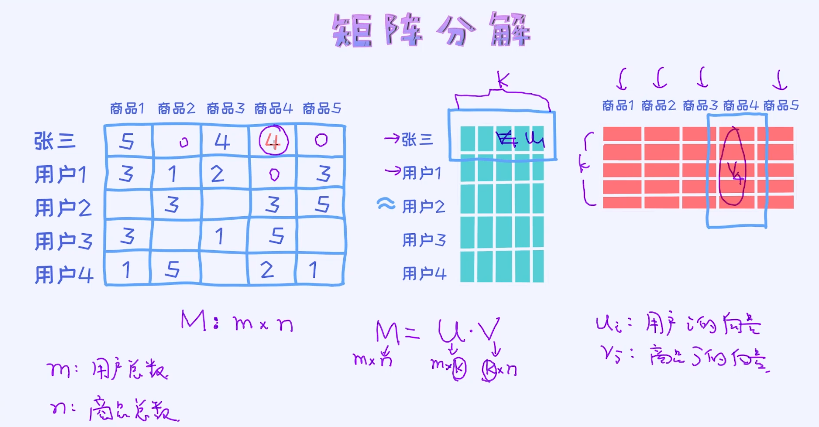



当我们得到每一个用户或者商品的向量表示之后，即可以`通过计算内积的方式来得出商品和用户之间的“匹配度”，也可以理解成一个用户对一个商品的偏好度`。

得到这些喜好度的值之后即可以对用户做推荐了。 给定某一个用户A， 我们可以计算A和所有商品之间的内积（dot product），然后把结果排序即可以得到A对哪个商品最喜欢了。

Reference：  
[1] [推荐系统中的矩阵分解技术](https://zhuanlan.zhihu.com/p/34497989)

### 20.3 矩阵分解的优化问题

在推荐系统上，矩阵分解的目标是要得出每一个用户和商品的向量。之后即可以计算出任意用户和商品之间的匹配度。

但这里需要注意的一点是，我们手中的原始矩阵中很多都是没有记录的。所以我们需要关注的只是有记录的部分。

矩阵分解的目标函数(损失函数)：  


$$min \frac{1}{2}\sum_{(i,j)\in \Omega}(u_i^Tv_j - r_{ij})^2 + \frac{\lambda_U}{2}||U||_F^2 + \frac{\lambda_V}{2}||V||_F^2$$
> 因为评分矩阵是一个稀疏矩阵，里面有很多元素缺失，我们把其中有值的这部分归为$\Omega$.  
> 后面两项是正则项，使用的是Frobenius Normal. 简称F-范数，是一种矩阵范数，记为$||·||F$。矩阵A的Frobenius范数定义为矩阵A各项元素的绝对值平方的总和，即:
> $${\displaystyle \|A\|_{\text{F}}={\sqrt {\sum _{i=1}^{m}\sum _{j=1}^{n}|a_{ij}|^{2}}}={\sqrt {\operatorname {trace} \left(A^{*}A\right)}}={\sqrt {\sum _{i=1}^{\min\{m,n\}}\sigma _{i}^{2}(A)}},}$$

有了损失函数后，我们可以使用梯度下降法来优化这个函数，针对于每一个用户和商品向量求梯度，然后做梯度的更新。

#### 协同过滤的优缺点
**优点：**相比于之前的基于内容推荐，推荐的内容更加多样化，可以推荐用户之前没有接触过的商品  
**缺点：**可解释性较差，对于冷启动问题没有很好的解决方案


### 20.4 融合冷启动的解决方案
针对冷启动的问题，一些常规的做法是让用户填写一些个人信息表，或者推荐热度比较高的商品。因为没有数据的时候，任何的推荐其实不具备个性化的，这个跟算法没有关系，只跟数据有关系。

其次，在推荐系统领域有一个比较有趣的观点是"exploration vs exploitation"。  
**核心思想：**根据用户的行为推荐一些他们喜欢的商品，同时也推荐一些新的产品给用户。不断挖掘用户新的兴趣点。（其实有时候，用户不知道他们想要的是什么）   
exploration:挖掘用户新的兴趣。  
exploitation:在了解用户之后，深挖。例如，一个用户喜欢AI相关的东西，进一步深挖是要了解这个用户对AI领域内的哪一个方向更感兴趣。  
所以我们既要去深度挖掘一个用户的兴趣点，同时也需要挖掘一个用户更广泛的兴趣点。

推荐系统领域的线上和线下的融合也是比较有趣的话题。online offline recommendation

考虑如：医院的流程优化 || 京东等电商的线下零售。